To solve the wave equation for the electric field in space and time using Python, we can use numerical methods. One common approach is to use the Finite Difference Time Domain (FDTD) method. Here is a basic outline and implementation of solving the wave equation for the electric field $ E(x, t) $ in one dimension using FDTD.

### Wave Equation

The wave equation for the electric field in one dimension is given by:

$$ \frac{\partial^2 E}{\partial t^2} = c^2 \frac{\partial^2 E}{\partial x^2} $$

where 4 c $ is the speed of light.

### FDTD Method

The FDTD method discretizes both time and space, and approximates the derivatives using finite differences.

1. Discretize the spatial domain $ x $ into $ N $ points with a spacing of $ \Delta x $.
2. Discretize the time domain $ t $ with a time step $\Delta t $.

The second-order derivatives can be approximated using finite differences:

$$ \frac{\partial^2 E}{\partial t^2} \approx \frac{E(x, t + \Delta t) - 2E(x, t) + E(x, t - \Delta t)}{\Delta t^2} $$

$$ \frac{\partial^2 E}{\partial x^2} \approx \frac{E(x + \Delta x, t) - 2E(x, t) + E(x - \Delta x, t)}{\Delta x^2} $$

Substituting these into the wave equation gives the update rule:

$$ E(x, t + \Delta t) = 2E(x, t) - E(x, t - \Delta t) + \frac{c^2 \Delta t^2}{\Delta x^2} \left( E(x + \Delta x, t) - 2E(x, t) + E(x - \Delta x, t) \right) $$

### Implementation in Python

Here's a basic implementation of this method:

```python
import numpy as np
import matplotlib.pyplot as plt

# Parameters
c = 3e8  # Speed of light in vacuum
L = 1.0  # Length of the spatial domain (meters)
T = 2e-9  # Total time to simulate (seconds)
Nx = 200  # Number of spatial points
Nt = 1000  # Number of time steps

# Discretization
dx = L / (Nx - 1)
dt = T / (Nt - 1)
x = np.linspace(0, L, Nx)
time = np.linspace(0, T, Nt)

# Stability condition
assert c * dt / dx < 1, "Stability condition is not met."

# Initial conditions
E = np.zeros((Nx, Nt))
E[:, 0] = np.sin(np.pi * x / L)  # Initial field distribution
E[:, 1] = E[:, 0]  # Assuming initial velocity is zero

# FDTD update loop
for t in range(1, Nt - 1):
    for i in range(1, Nx - 1):
        E[i, t + 1] = 2 * E[i, t] - E[i, t - 1] + (c * dt / dx)**2 * (E[i + 1, t] - 2 * E[i, t] + E[i - 1, t])

# Plot the results
plt.figure(figsize=(10, 6))
for t in range(0, Nt, Nt // 10):  # Plot a few time steps
    plt.plot(x, E[:, t], label=f't = {t*dt:.2e} s')

plt.xlabel('x (m)')
plt.ylabel('E (arb. units)')
plt.title('Wave propagation using FDTD')
plt.legend()
plt.show()
```

### Explanation

1. **Parameters and Discretization**: The speed of light, spatial domain length, total simulation time, number of spatial points, and number of time steps are defined. The spatial and temporal steps are calculated.
2. **Initial Conditions**: The electric field is initialized. Here, we use a sine wave as the initial condition.
3. **FDTD Update Loop**: The electric field is updated at each time step using the FDTD method.
4. **Plotting**: The results are plotted for a few selected time steps to visualize the wave propagation.

This is a simple implementation and can be extended to handle more complex boundary conditions, higher dimensions, or different initial conditions.

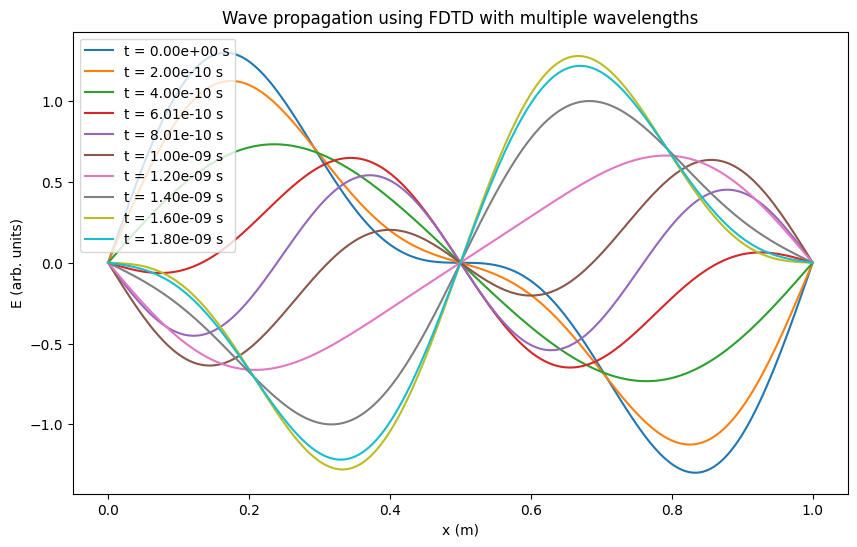

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
c = 3e8  # Speed of light in vacuum
L = 1.0  # Length of the spatial domain (meters)
T = 2e-9  # Total time to simulate (seconds)
Nx = 200  # Number of spatial points
Nt = 1000  # Number of time steps

# Discretization
dx = L / (Nx - 1)
dt = T / (Nt - 1)
x = np.linspace(0, L, Nx)
time = np.linspace(0, T, Nt)

# Stability condition
assert c * dt / dx < 1, "Stability condition is not met."

# Initial conditions with multiple wavelengths
E = np.zeros((Nx, Nt))

# Combining sine waves with different wavelengths
E[:, 0] = np.sin(2 * np.pi * x / L) + 0.5 * np.sin(4 * np.pi * x / L)

# Assuming initial velocity is zero
E[:, 1] = E[:, 0]

# FDTD update loop
for t in range(1, Nt - 1):
    for i in range(1, Nx - 1):
        E[i, t + 1] = 2 * E[i, t] - E[i, t - 1] + (c * dt / dx)**2 * (E[i + 1, t] - 2 * E[i, t] + E[i - 1, t])

# Plot the results
plt.figure(figsize=(10, 6))
for t in range(0, Nt, Nt // 10):  # Plot a few time steps
    plt.plot(x, E[:, t], label=f't = {t*dt:.2e} s')

plt.xlabel('x (m)')
plt.ylabel('E (arb. units)')
plt.title('Wave propagation using FDTD with multiple wavelengths')
plt.legend()
plt.show()